In [1]:
	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data=pd.read_csv("pcos_rotterdam_balanceado.csv")
data.head(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB


In [4]:
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,30.052667,23.646000,0.289333,57.228267,10.732333,0.200000
std,7.549982,4.510006,0.453529,18.171066,8.471478,0.400067
min,18.000000,8.500000,0.000000,20.500000,3.000000,0.000000
25%,24.000000,20.800000,0.000000,45.200000,5.000000,0.000000
50%,30.000000,23.400000,0.000000,53.200000,8.000000,0.000000
75%,36.000000,26.300000,1.000000,64.100000,11.000000,0.000000
max,44.000000,44.700000,1.000000,136.400000,39.000000,1.000000


In [5]:
data.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [6]:
data.duplicated().sum()

0

<Axes: >

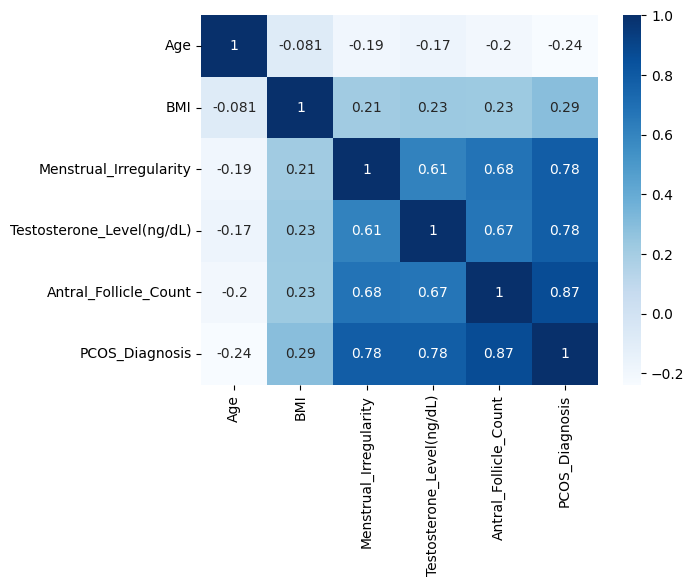

In [10]:
sns.heatmap(data.corr(),cmap="Blues",annot=True)

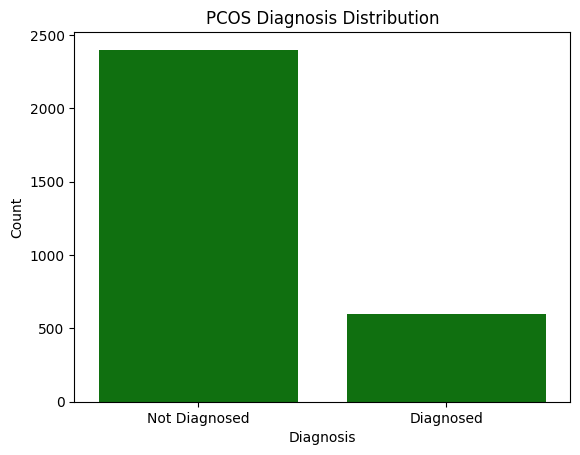

In [16]:
sns.countplot(x="PCOS_Diagnosis", data=data,color="green")
plt.xticks([0, 1], ["Not Diagnosed", "Diagnosed"])
plt.title("PCOS Diagnosis Distribution")
plt.ylabel("Count")
plt.xlabel("Diagnosis")
plt.show()

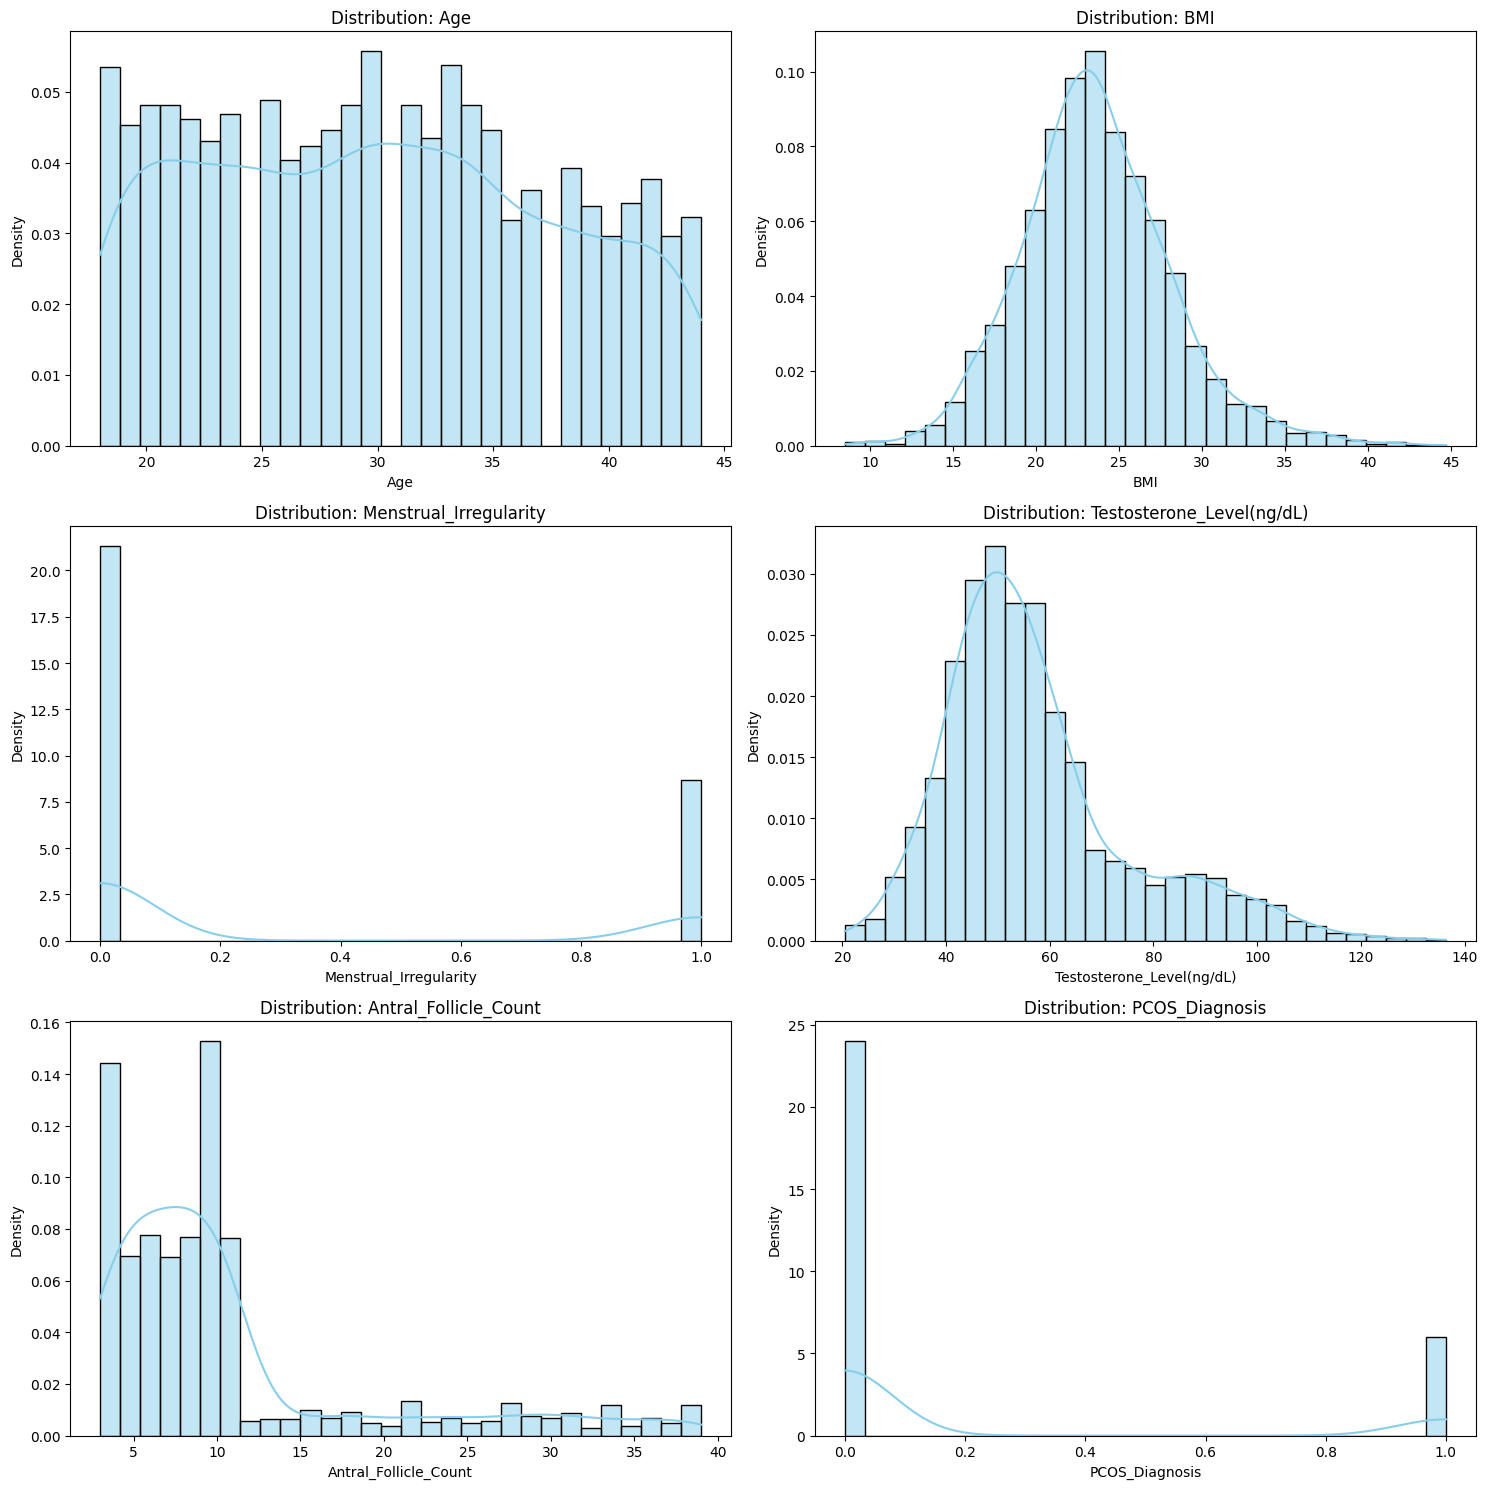

In [24]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.histplot(data[column], kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [21]:
x=data.drop(["PCOS_Diagnosis"],axis=1)
y=data["PCOS_Diagnosis"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
# Cla

In [25]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [26]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"F1 Score: {f1*100}")
    print(f"Recall: {recall*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 100.0
Precision: 100.0
F1 Score: 100.0
Recall: 100.0
------------------------------
Model: Decision Tree Classifier
Accuracy: 100.0
Precision: 100.0
F1 Score: 100.0
Recall: 100.0
------------------------------
Model: Ada Boost Classifier
Accuracy: 100.0
Precision: 100.0
F1 Score: 100.0
Recall: 100.0
------------------------------
Model: Logistic Regression
Accuracy: 99.66666666666667
Precision: 100.0
F1 Score: 99.27536231884058
Recall: 98.56115107913669
------------------------------
Model: Gradiant Boosting Classifier
Accuracy: 100.0
Precision: 100.0
F1 Score: 100.0
Recall: 100.0
------------------------------
Model: Naive Bayes Classifier
Accuracy: 90.16666666666666
Precision: 70.2020202020202
F1 Score: 82.49258160237389
Recall: 100.0
------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Result

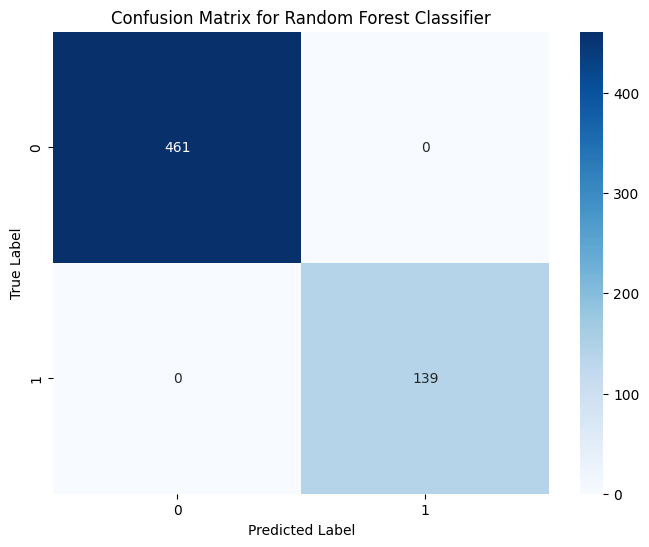

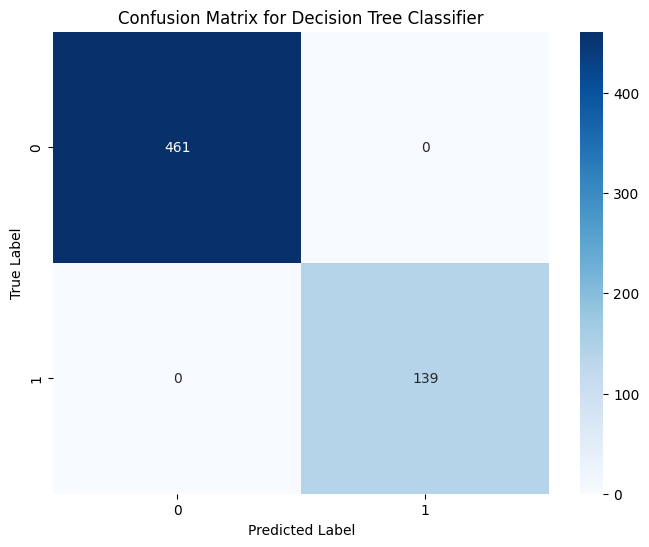

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


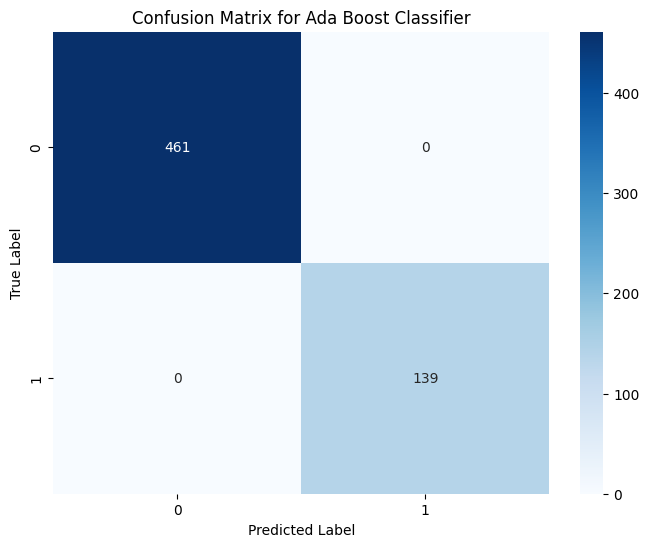

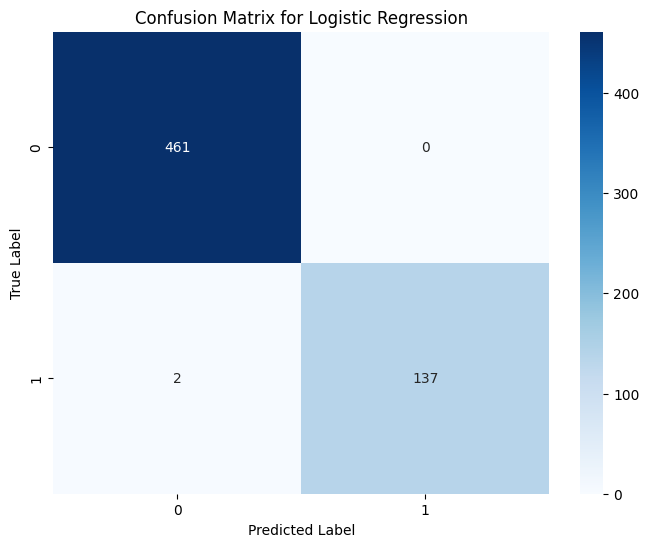

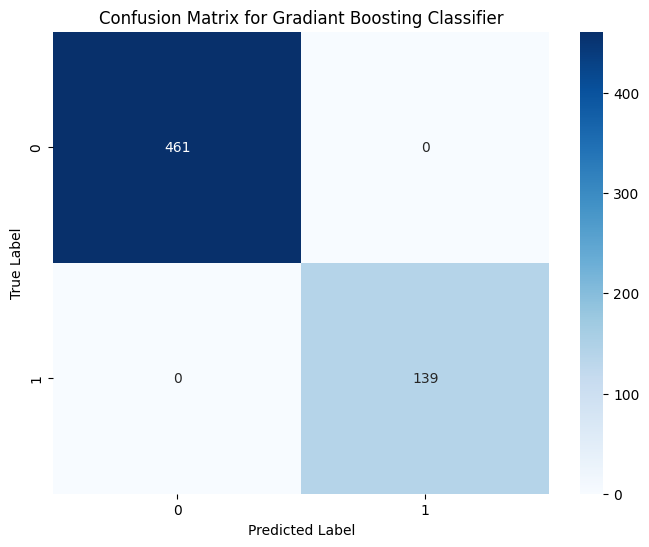

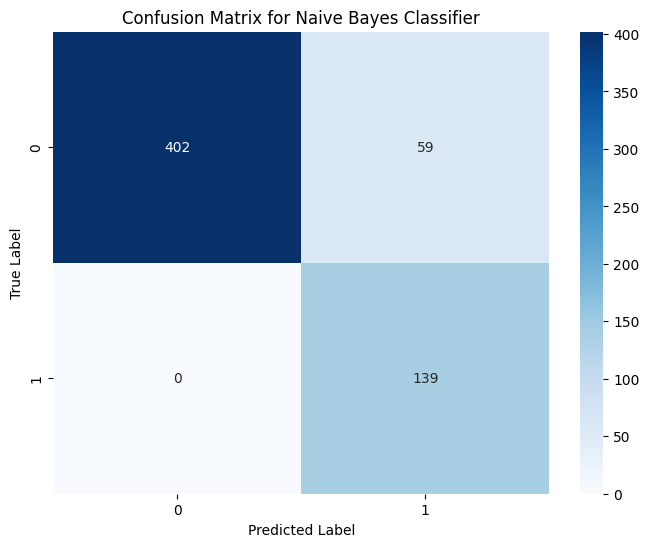

In [27]:
	
accuracy_results={}
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<Figure size 1400x600 with 0 Axes>

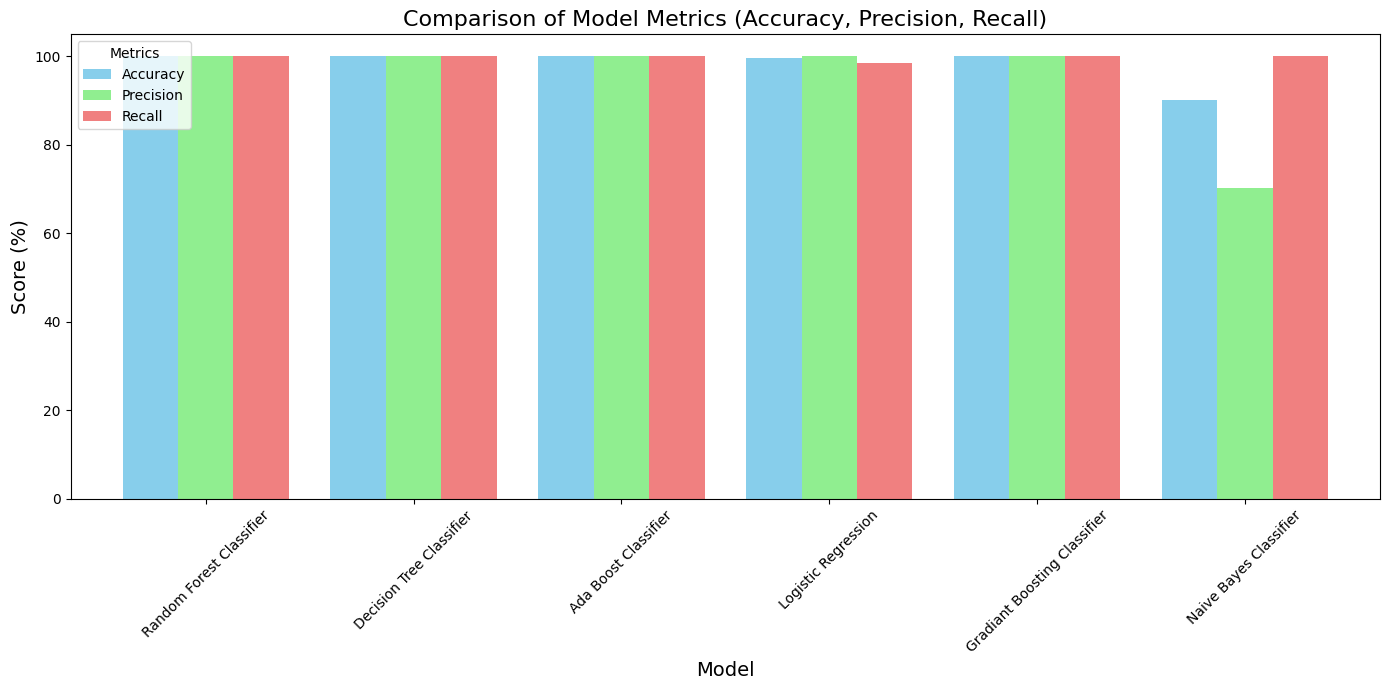

In [28]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(14, 6))
metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(14, 7), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Model Metrics (Accuracy, Precision, Recall)', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()